___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Keras Basics

In [1]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [3]:
y = 2*x + b + noise

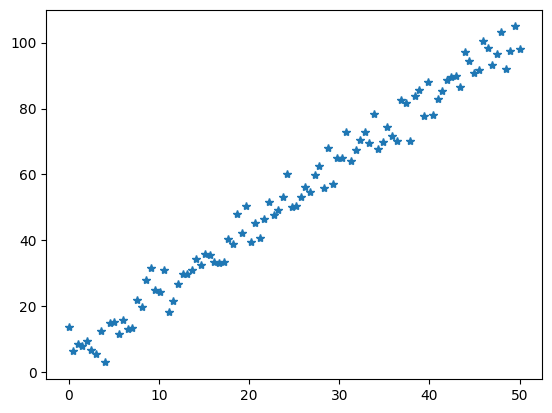

In [4]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

/Users/yingliu/Desktop/self-dev/time-series/notebooks/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [8]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3014.5242  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 2706.0232
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 2863.1445
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 2819.8486
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 2791.7090
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 2840.2693
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 2917.5977
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 2643.9548
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 2564.7383
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 2608.1201
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 2518.2185
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 2521.6997
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2709.6089
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 2477.2996
Epoch 15/500
4/4 ━━━━━━━━━━━━━━

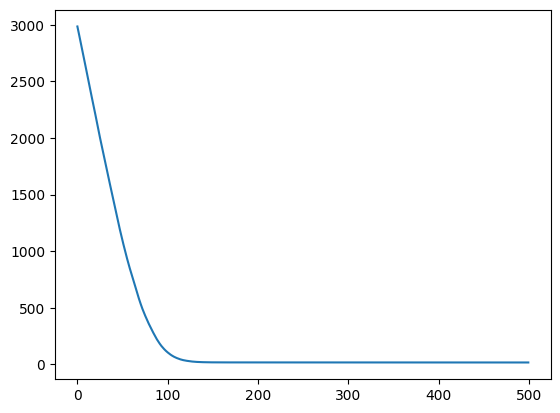

In [10]:
loss = model.history.history['loss']
epoches = range(len(loss))
plt.plot(epoches, loss)

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [11]:
x_for_predictions = np.linspace(0,50,1000)

In [12]:
y_predicted = model.predict(x_for_predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


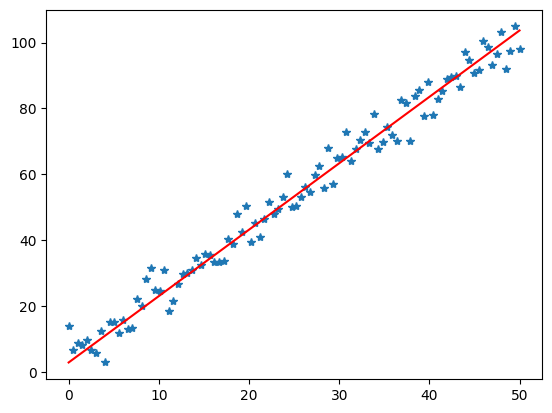

In [13]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


In [16]:
mean_squared_error(y,prediction_for_true_y)

17.59098728122259

In [17]:
mean_absolute_error(y,prediction_for_true_y)

3.406602590607115

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!